<a href="https://colab.research.google.com/github/a-forty-two/COG-02082021/blob/main/COG_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls


data.csv  sample_data


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df = data.iloc[:, [1,2,5,6,9]]
df.head()

,diagnosis,radius_mean,area_mean,smoothness_mean,concave points_mean
0,M,17.99,1001.0,0.11840,0.14710
1,M,20.57,1326.0,0.08474,0.07017
2,M,19.69,1203.0,0.10960,0.12790
3,M,11.42,386.1,0.14250,0.10520
4,M,20.29,1297.0,0.10030,0.10430


In [7]:


y= df.pop('diagnosis')
x = df

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y , test_size=0.2, random_state=42)
# Decision Tree: y=f(x)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5)
dtree_light = DecisionTreeClassifier(max_depth=3)
dtree_deep = DecisionTreeClassifier(max_depth=10)
dtree.fit(xtrain,ytrain)
dtree_light.fit(xtrain,ytrain)
dtree_deep.fit(xtrain,ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
pred1 = dtree.predict(xtest)
pred2 = dtree_light.predict(xtest)
pred3 = dtree_deep.predict(xtest)
from sklearn.metrics import accuracy_score

score = accuracy_score(pred1,pred2)
print(score)
score = accuracy_score(pred2,pred3)
print(score)
score = accuracy_score(pred1,pred3)
print(score)



0.9385964912280702
0.956140350877193
0.9649122807017544


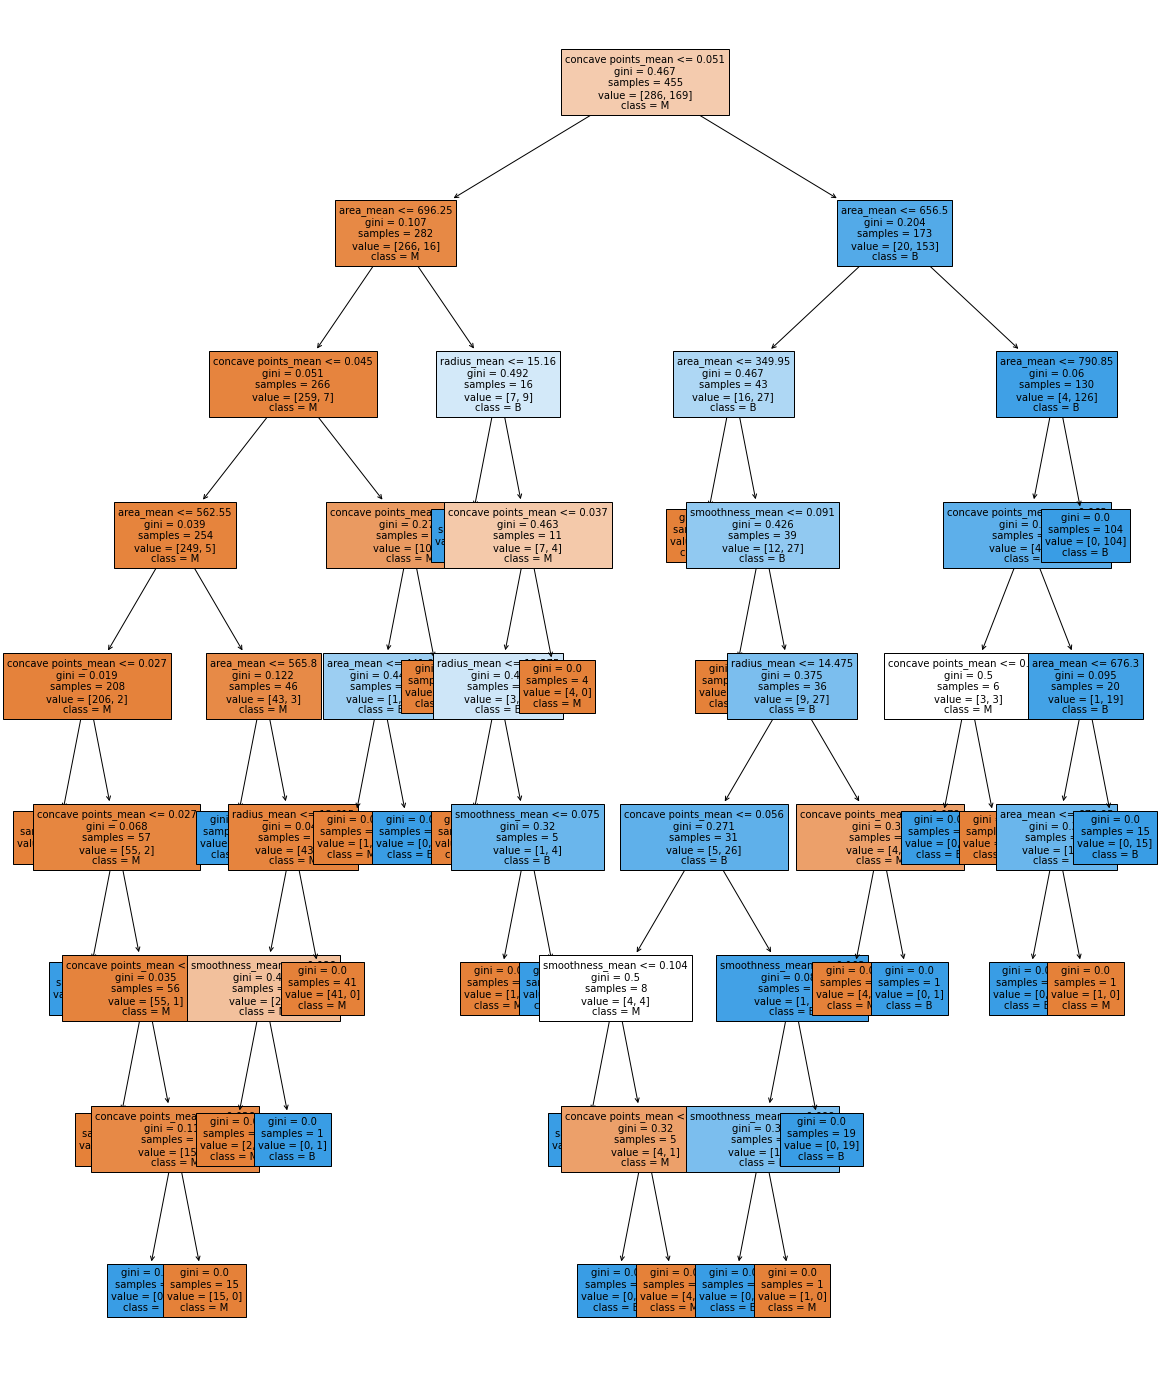

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,25))
a= plot_tree(dtree_deep, feature_names=x.columns,fontsize = 10, filled=True, class_names=['M','B'])
plt.show()